In [1]:
import os
import random
from PIL import Image, ImageDraw, ImageFont
import numpy as np

In [2]:
def strike_through(image, level='word'):
    """ Apply a strike-through effect to the image. """
    draw = ImageDraw.Draw(image)
    width, height = image.size
    if level == 'word':
        # Strike through the entire word
        y = height // 2
        x1, x2 = 0, width
    else:
        # Strike through a single letter
        letter_width = width // len(level)
        letter_index = random.randint(0, len(level) - 1)
        x1, x2 = letter_index * letter_width, (letter_index + 1) * letter_width
        y = height // 2

    angle = random.randint(-15, 15)  # Random angle for the strike line
    end_y = int(y + (x2 - x1) * np.tan(np.radians(angle)))
    draw.line((x1, y, x2, end_y), fill='black', width=3)
    return image, letter_index if level != 'word' else -1

In [ ]:




def create_word_from_characters(character_folders):
    """ Create a word by randomly selecting characters and concatenating them. """
    chosen_characters = [random.choice(character_folders) for _ in range(random.randint(2, 5))]
    images = [Image.open(random.choice(os.listdir(folder))) for folder in chosen_characters]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset, 0))
        x_offset += im.size[0]

    return new_im, chosen_characters

def main(data_dir, num_images):
    character_folders = [os.path.join(data_dir, folder) for folder in os.listdir(data_dir) if not folder.startswith('.')]
    word_folder = os.path.join(data_dir, 'Words')
    strikeout_folder = os.path.join(data_dir, 'StrikeOutWords')
    os.makedirs(word_folder, exist_ok=True)
    os.makedirs(strikeout_folder, exist_ok=True)

    for i in range(num_images):
        word_image, characters = create_word_from_characters(character_folders)
        if random.choice([True, False]):
            # Save normal word
            file_path = os.path.join(word_folder, f'word_{i}.png')
            word_image.save(file_path)
            annotation = '\\'.join([os.path.basename(folder) for folder in characters])
        else:
            # Apply strike-through
            strike_level = random.choice(['word'] + characters)  # Either strike the whole word or a single letter
            struck_image, strike_index = strike_through(word_image.copy(), level=strike_level)
            file_path = os.path.join(strikeout_folder, f'strikeout_word_{i}.png')
            struck_image.save(file_path)
            if strike_index == -1:
                annotation = '-'
            else:
                annotation_list = [os.path.basename(folder) for folder in characters]
                annotation_list[strike_index] = '-'
                annotation = '\\'.join(annotation_list)

        # Save annotation
        with open(file_path.replace('.png', '.txt'), 'w') as f:
            f.write(annotation)

if __name__ == '__main__':
    dataset_dir = 'D:\\SDP\\DevanagariHandwrittenCharacterDataset\\data'
    total_images = 100  # Total number of images to generate
    main(dataset_dir, total_images)


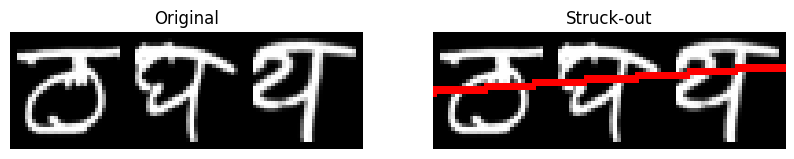

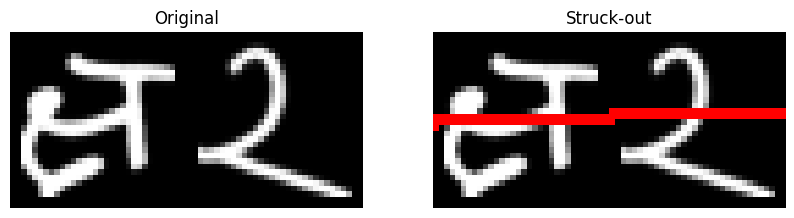

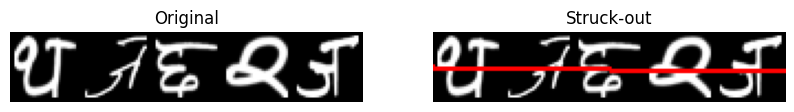

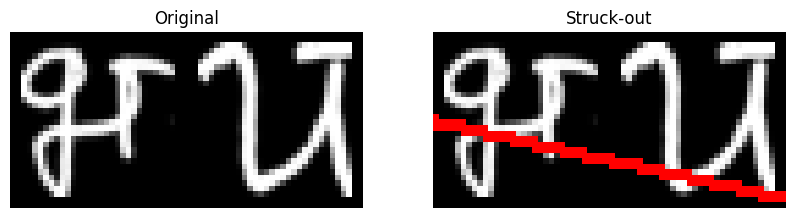

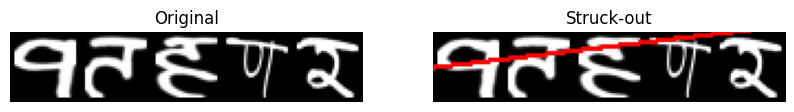

In [6]:
import os
import random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

def strike_through(image):
    """ Apply a random strike-through effect to the image. """
    draw = ImageDraw.Draw(image)
    width, height = image.size
    y = height // 2
    x1, x2 = 0, width
    angle = random.randint(-15, 15)  # Random angle for the strike line
    end_y = int(y + (x2 - x1) * np.tan(np.radians(angle)))
    draw.line((x1, y, x2, end_y), fill=(255, 0, 0), width=3)
    return image

def create_word_from_characters(character_folders):
    """ Create a word by randomly selecting characters and concatenating them. """
    chosen_characters = [random.choice(character_folders) for _ in range(random.randint(2, 5))]
    images = [Image.open(os.path.join(folder, random.choice(os.listdir(folder)))) for folder in chosen_characters]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset, 0))
        x_offset += im.size[0]

    return new_im, chosen_characters

def display_images(data_dir, num_images=5):
    character_folders = [os.path.join(data_dir, folder) for folder in os.listdir(data_dir) if not folder.startswith('.')]
    for i in range(num_images):
        word_image, characters = create_word_from_characters(character_folders)
        # Apply strike-through
        struck_image = strike_through(word_image.copy())
        
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(word_image)
        plt.title('Original')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(struck_image)
        plt.title('Struck-out')
        plt.axis('off')
        
        plt.show()

# Use this function call in your Jupyter Notebook
data_directory = "Dataset/data"
display_images(data_directory)


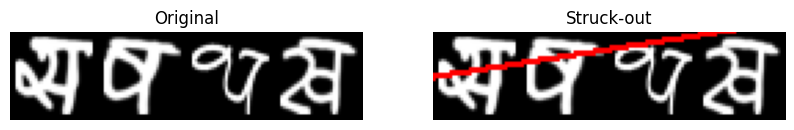

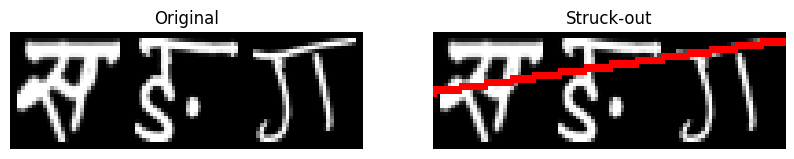

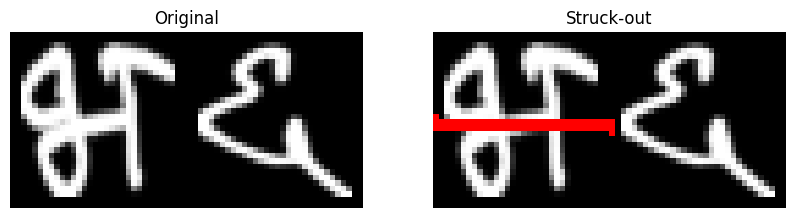

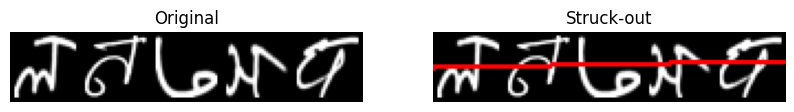

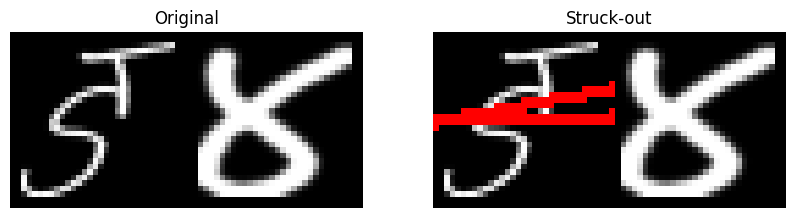

In [8]:
import os
import random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

def strike_through(image, characters):
    """ Apply a random strike-through effect to the image, either on the whole word or individual letters. """
    draw = ImageDraw.Draw(image)
    width, height = image.size
    num_strikes = random.randint(1, 3)  # Randomly decide how many strikes to apply
    strikes_applied = 0
    
    while strikes_applied < num_strikes:
        strike_type = random.choice(['whole', 'letter'])
        if strike_type == 'whole':
            y = height // 2
            x1, x2 = 0, width
            angle = random.randint(-15, 15)
            end_y = int(y + (x2 - x1) * np.tan(np.radians(angle)))
            draw.line((x1, y, x2, end_y), fill=(255, 0, 0), width=3)
            break  # If whole word is struck, exit the loop
        else:
            letter_index = random.randint(0, len(characters) - 1)
            letter_width = width // len(characters)
            x1, x2 = letter_index * letter_width, (letter_index + 1) * letter_width
            y = height // 2
            angle = random.randint(-15, 15)
            end_y = int(y + (x2 - x1) * np.tan(np.radians(angle)))
            draw.line((x1, y, x2, end_y), fill=(255, 0, 0), width=3)
            strikes_applied += 1

    return image

def create_word_from_characters(character_folders):
    """ Create a word by randomly selecting characters and concatenating them. """
    chosen_characters = [random.choice(character_folders) for _ in range(random.randint(2, 5))]
    images = [Image.open(os.path.join(folder, random.choice(os.listdir(folder)))) for folder in chosen_characters]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset, 0))
        x_offset += im.size[0]

    return new_im, chosen_characters

def display_images(data_dir, num_images=5):
    character_folders = [os.path.join(data_dir, folder) for folder in os.listdir(data_dir) if not folder.startswith('.')]
    for i in range(num_images):
        word_image, characters = create_word_from_characters(character_folders)
        # Apply strike-through
        struck_image = strike_through(word_image.copy(), characters)
        
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(word_image)
        plt.title('Original')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(struck_image)
        plt.title('Struck-out')
        plt.axis('off')
        
        plt.show()

# Use this function call in your Jupyter Notebook
data_directory = "Dataset/data"
display_images(data_directory)


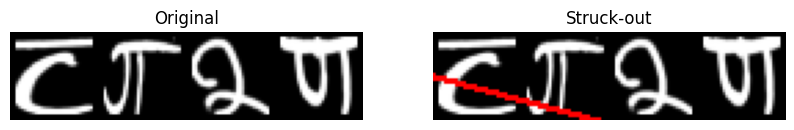

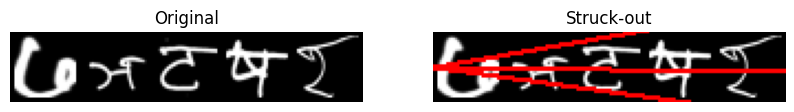

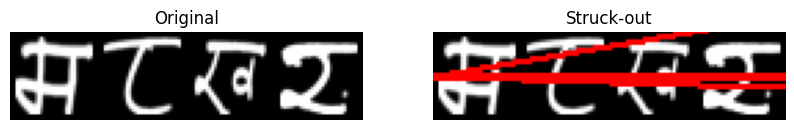

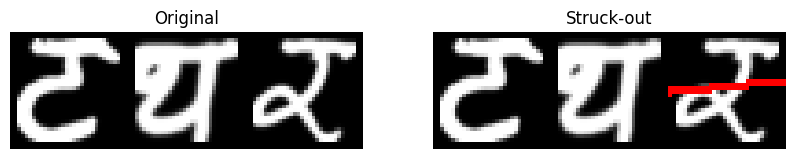

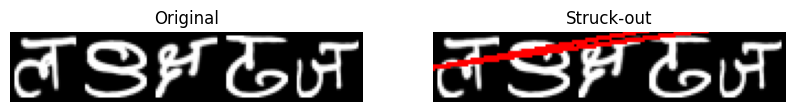

In [14]:
import os
import random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np

def strike_through(image, characters):
    """ Apply a random strike-through effect to the image, with detailed control over the strike process. """
    draw = ImageDraw.Draw(image)
    width, height = image.size
    
    # Decide strike type and number of strikes
    strike_type = random.choice(['whole', 'letter'])
    if strike_type == 'whole':
        num_strikes = random.randint(1, 3)  # Random number of strikes for the whole word
        for _ in range(num_strikes):
            y = height // 2
            x1, x2 = 0, width
            angle = random.randint(-15, 15)
            end_y = int(y + (x2 - x1) * np.tan(np.radians(angle)))
            draw.line((x1, y, x2, end_y), fill=(255, 0, 0), width=3)
    else:
        num_strikes = random.randint(1, min(3, len(characters)))  # Limit strikes to number of letters
        struck_letters = random.sample(range(len(characters)), num_strikes)
        for letter_index in struck_letters:
            letter_width = width // len(characters)
            x1, x2 = letter_index * letter_width, (letter_index + 1) * letter_width
            y = height // 2
            angle = random.randint(-15, 15)
            end_y = int(y + (x2 - x1) * np.tan(np.radians(angle)))
            draw.line((x1, y, x2, end_y), fill=(255, 0, 0), width=3)

    return image

def create_word_from_characters(character_folders):
    """ Create a word by randomly selecting characters and concatenating them. """
    chosen_characters = [random.choice(character_folders) for _ in range(random.randint(2, 5))]
    images = [Image.open(os.path.join(folder, random.choice(os.listdir(folder)))) for folder in chosen_characters]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset, 0))
        x_offset += im.size[0]

    return new_im, chosen_characters

def display_images(data_dir, num_images=5):
    character_folders = [os.path.join(data_dir, folder) for folder in os.listdir(data_dir) if not folder.startswith('.')]
    for i in range(num_images):
        word_image, characters = create_word_from_characters(character_folders)
        # Apply strike-through
        struck_image = strike_through(word_image.copy(), characters)
        
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(word_image)
        plt.title('Original')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(struck_image)
        plt.title('Struck-out')
        plt.axis('off')
        
        plt.show()

# Use this function call in your Jupyter Notebook
data_directory = "Dataset/data"
display_images(data_directory)


In [15]:
import os
import random
from PIL import Image, ImageDraw
import numpy as np

def strike_through(image, characters):
    """ Apply a random strike-through effect to the image, with detailed control over the strike process. """
    draw = ImageDraw.Draw(image)
    width, height = image.size
    
    annotations = []
    strike_type = random.choice(['whole', 'letter'])
    if strike_type == 'whole':
        num_strikes = random.randint(1, 3)
        for _ in range(num_strikes):
            y = height // 2
            x1, x2 = 0, width
            angle = random.randint(-15, 15)
            end_y = int(y + (x2 - x1) * np.tan(np.radians(angle)))
            draw.line((x1, y, x2, end_y), fill=(255, 0, 0), width=3)
        annotations = ["-"] * len(characters)  # Entire word is struck
    else:
        num_strikes = random.randint(1, min(3, len(characters)))
        struck_letters = random.sample(range(len(characters)), num_strikes)
        for letter_index in struck_letters:
            letter_width = width // len(characters)
            x1, x2 = letter_index * letter_width, (letter_index + 1) * letter_width
            y = height // 2
            angle = random.randint(-15, 15)
            end_y = int(y + (x2 - x1) * np.tan(np.radians(angle)))
            draw.line((x1, y, x2, end_y), fill=(255, 0, 0), width=3)
            annotations.append("-")
        for i in range(len(characters)):
            if i not in struck_letters:
                annotations.append(os.path.basename(characters[i]))

    return image, '\\'.join(annotations)

def create_word_from_characters(character_folders):
    """ Create a word by randomly selecting characters and concatenating them. """
    chosen_characters = [random.choice(character_folders) for _ in range(random.randint(2, 5))]
    images = [Image.open(os.path.join(folder, random.choice(os.listdir(folder)))) for folder in chosen_characters]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset, 0))
        x_offset += im.size[0]

    return new_im, chosen_characters

def generate_and_save_images(data_dir, output_dir, num_images=5):
    character_folders = [os.path.join(data_dir, folder) for folder in os.listdir(data_dir) if not folder.startswith('.')]
    os.makedirs(output_dir, exist_ok=True)
    image_output_folder = os.path.join(output_dir, 'images')
    annotation_output_folder = os.path.join(output_dir, 'annotations')
    os.makedirs(image_output_folder, exist_ok=True)
    os.makedirs(annotation_output_folder, exist_ok=True)

    for i in range(num_images):
        word_image, characters = create_word_from_characters(character_folders)
        struck_image, annotation = strike_through(word_image.copy(), characters)
        
        image_filename = f'image_{i}.png'
        annotation_filename = f'annotation_{i}.txt'
        
        struck_image.save(os.path.join(image_output_folder, image_filename))
        with open(os.path.join(annotation_output_folder, annotation_filename), 'w') as file:
            file.write(annotation)

# Example usage
data_directory = "Dataset/data"
output_directory = "Data/"
generate_and_save_images(data_directory, output_directory, num_images=100)


In [16]:
import os
import random
from PIL import Image, ImageDraw
import numpy as np

def strike_through(image, characters, apply_to='word'):
    """ Apply a random strike-through effect to the image, with detailed control over the strike process. """
    draw = ImageDraw.Draw(image)
    width, height = image.size
    annotations = list(characters)  # Start with original characters as annotations

    if apply_to == 'word':
        # Strike through the entire word
        num_strikes = random.randint(1, 3)
        for _ in range(num_strikes):
            y = height // 2
            x1, x2 = 0, width
            angle = random.randint(-15, 15)
            end_y = int(y + (x2 - x1) * np.tan(np.radians(angle)))
            draw.line((x1, y, x2, end_y), fill='red', width=3)
        annotations = ['-'] * len(characters)  # Entire word is struck
    else:
        # Strike individual letters
        num_strikes = random.randint(1, len(characters))
        struck_indices = random.sample(range(len(characters)), num_strikes)
        for index in struck_indices:
            letter_width = width // len(characters)
            x1, x2 = index * letter_width, (index + 1) * letter_width
            y = height // 2
            angle = random.randint(-15, 15)
            end_y = int(y + (x2 - x1) * np.tan(np.radians(angle)))
            draw.line((x1, y, x2, end_y), fill='red', width=3)
            annotations[index] = '-'  # Mark struck letters with '-'

    return image, '\\'.join(annotations)

def create_word_from_characters(character_folders):
    """ Create a word by randomly selecting characters and concatenating them. """
    chosen_characters = [random.choice(character_folders) for _ in range(random.randint(2, 5))]
    images = [Image.open(os.path.join(folder, random.choice(os.listdir(folder)))) for folder in chosen_characters]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset, 0))
        x_offset += im.size[0]

    return new_im, chosen_characters

def generate_dataset(data_dir, output_dir, num_images):
    character_folders = [os.path.join(data_dir, folder) for folder in os.listdir(data_dir) if not folder.startswith('.')]
    os.makedirs(output_dir, exist_ok=True)
    words_output = os.path.join(output_dir, 'Words')
    strikeout_output = os.path.join(output_dir, 'StrikeOutWords')
    os.makedirs(words_output, exist_ok=True)
    os.makedirs(strikeout_output, exist_ok=True)

    for i in range(num_images):
        word_image, characters = create_word_from_characters(character_folders)
        strike_decision = random.choice(['normal', 'strike'])
        
        if strike_decision == 'normal':
            # Save normal words
            image_path = os.path.join(words_output, f'word_{i}.png')
            annotation = '\\'.join([os.path.basename(folder) for folder in characters])
        else:
            # Apply and save struck words
            strike_type = random.choice(['word', 'letter'])
            struck_image, annotation = strike_through(word_image.copy(), characters, apply_to=strike_type)
            image_path = os.path.join(strikeout_output, f'strike_word_{i}.png')
            word_image = struck_image  # Replace with the struck image for saving
        
        word_image.save(image_path)
        annotation_path = image_path.replace('.png', '.txt')
        with open(annotation_path, 'w') as file:
            file.write(annotation)

# Example usage
data_directory = "Dataset/data"
output_directory = "Word_Dataset/"
total_images = 20000
generate_dataset(data_directory, output_directory, total_images)


In [19]:
import os
import random
from PIL import Image, ImageDraw
import numpy as np

def strike_through(image, characters, apply_to='word'):
    """ Apply a random strike-through effect to the image, with detailed control over the strike process. """
    draw = ImageDraw.Draw(image)
    width, height = image.size
    annotations = list(characters)  # Start with original characters as annotations

    if apply_to == 'whole':
        num_strikes = random.randint(1, 3)  # Random number of strikes for the whole word
        for _ in range(num_strikes):
            y = height // 2
            x1, x2 = 0, width
            angle = random.randint(-15, 15)
            end_y = int(y + (x2 - x1) * np.tan(np.radians(angle)))
            draw.line((x1, y, x2, end_y), fill='red', width=3)
        annotations = ['-'] * len(characters)  # Entire word is struck
    else:
        # Strike individual letters
        num_strikes = random.randint(1, min(3, len(characters)))
        struck_indices = random.sample(range(len(characters)), num_strikes)
        for index in struck_indices:
            letter_width = width // len(characters)
            x1, x2 = index * letter_width, (index + 1) * letter_width
            y = height // 2
            angle = random.randint(-15, 15)
            end_y = int(y + (x2 - x1) * np.tan(np.radians(angle)))
            draw.line((x1, y, x2, end_y), fill='red', width=3)
            annotations[index] = '-'  # Mark struck letters with '-'

    return image, '\\'.join(annotations)

def create_word_from_characters(character_folders):
    """ Create a word by randomly selecting characters and concatenating them. """
    num_letters = random.randint(2, 8)  # Choose a random number of letters between 3 and 9
    chosen_characters = [random.choice(character_folders) for _ in range(num_letters)]
    images = [Image.open(os.path.join(folder, random.choice(os.listdir(folder)))) for folder in chosen_characters]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset, 0))
        x_offset += im.size[0]

    return new_im, [os.path.basename(folder) for folder in chosen_characters]

def generate_dataset(data_dir, output_dir, num_images):
    character_folders = [os.path.join(data_dir, folder) for folder in os.listdir(data_dir) if not folder.startswith('.')]
    image_output_dir = os.path.join(output_dir, 'images')
    annotation_output_dir = os.path.join(output_dir, 'annotations')
    
    # Create subdirectories for images and annotations
    os.makedirs(os.path.join(image_output_dir, 'Words'), exist_ok=True)
    os.makedirs(os.path.join(image_output_dir, 'StrikeOutWords'), exist_ok=True)
    os.makedirs(os.path.join(annotation_output_dir, 'Words'), exist_ok=True)
    os.makedirs(os.path.join(annotation_output_dir, 'StrikeOutWords'), exist_ok=True)

    for i in range(num_images):
        word_image, characters = create_word_from_characters(character_folders)
        strike_decision = random.choice(['normal', 'strike'])

        if strike_decision == 'normal':
            # Save normal words
            image_path = os.path.join(image_output_dir, 'Words', f'word_{i}.png')
            annotation_path = os.path.join(annotation_output_dir, 'Words', f'word_{i}.txt')
            annotation = '\\'.join(characters)
            word_image.save(image_path)
        else:
            # Apply and save struck words
            strike_type = random.choice(['whole', 'letter'])
            struck_image, annotation = strike_through(word_image.copy(), characters, apply_to=strike_type)
            image_path = os.path.join(image_output_dir, 'StrikeOutWords', f'strike_word_{i}.png')
            annotation_path = os.path.join(annotation_output_dir, 'StrikeOutWords', f'strike_word_{i}.txt')
            struck_image.save(image_path)

        with open(annotation_path, 'w') as file:
            file.write(annotation)

# Example usage
data_directory = "Dataset/data"
output_directory = "Word_Dataset/"
total_images = 20000
generate_dataset(data_directory, output_directory, total_images)
